In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 7.89 MiB | 5.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Observe all unfiltered data
df_all = pd.read_parquet('DS-3001-Projects/Project 1/gss_chunk_3.parquet')
print(df_all.shape, '\n')
df_all.head()

(24130, 6694) 



,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
0,2006,1751,working full time,40.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079141,0.961150
1,2006,1752,in school,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.673834,6.641571
2,2006,1753,working full time,35.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584663,0.512145
3,2006,1754,working full time,50.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715731,0.637592
4,2006,1755,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094831,0.956094


In [4]:
year = df_all['year']
print(year.unique(), '\n')

[2006 2008 2010 2012 2014 2016 2018 2021 2022] 



In [5]:
# Make new dataframe with years 2022, 2021, 2018

#df = df_all.loc[(df_all['year'] == 2022)]
df = df_all.loc[(df_all['year'] == 2022) | (df_all['year'] == 2021) | (df_all['year'] == 2018)]
print(df.shape, '\n')
df.head()

(9924, 6694) 



,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
14206,2018,1,"with a job, but not at work because of tempora...",NaN,41.0,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.908104,2.244275
14207,2018,2,retired,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914550,1.095217
14208,2018,3,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609109,0.740432
14209,2018,4,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642403,0.769342
14210,2018,5,retired,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.396347,0.462239


In [6]:
# Confirm all data is from correct years: 2022, 2021, 2018
year = df['year']
print(year.unique(), '\n')

[2018 2021 2022] 



In [7]:
# Select the columns we want to use: mntlhtlh, hrs2, income16, wrkslf
df = df.loc[:,['mntlhlth','hrs2','income16', 'wrkslf']]
print(df.shape, '\n')
print(df.head())


(9924, 4) 

       mntlhlth  hrs2              income16        wrkslf
14206      20.0  41.0                   NaN  someone else
14207       NaN   NaN    $30,000 to $34,999  someone else
14208       3.0   NaN  $150,000 to $169,999  someone else
14209       1.0   NaN      $170,000 or over  someone else
14210       NaN   NaN      $170,000 or over  someone else


In [8]:
# Remove all nan/missing values
df = df.dropna()
print(df.shape, '\n')
print(df.head())

(120, 4) 

       mntlhlth  hrs2              income16        wrkslf
14293       0.0  40.0      $170,000 or over  someone else
14296       1.0  45.0   $90,000 to $109,999  someone else
14303       0.0  50.0  $130,000 to $149,999  someone else
14310       0.0  24.0    $60,000 to $74,999  someone else
14444       0.0  15.0  $150,000 to $169,999  someone else


In [9]:
# Make a copy of the mntlhlth column
# mntlhlth: days of poor mental health past 30 days, for how many days during the past 30 days was your mental health not good?
# mental health: stress, depression, problems with emotions
mh = df['mntlhlth']
print(mh.unique(), '\n')
mh.value_counts()

[ 0.  1.  2. 10. 14.  5. 30.  3. 15. 25.  4. 20.  6.  7.  8. 12.] 



0.0     51
30.0    13
5.0     11
2.0      9
10.0     7
15.0     6
1.0      4
3.0      4
14.0     3
4.0      3
20.0     3
25.0     2
6.0      1
7.0      1
8.0      1
12.0     1
Name: mntlhlth, dtype: int64

In [10]:
# Confirm there are no missing values
print('Total missing: ', sum(mh.isnull()))

Total missing:  0


In [11]:
# number of hours worked per week
hoursworked = df["hrs2"]
hoursworked.value_counts()

40.0    49
50.0    16
45.0     5
35.0     5
30.0     4
60.0     4
25.0     4
48.0     3
10.0     3
55.0     3
38.0     2
80.0     2
36.0     2
70.0     2
6.0      2
15.0     2
24.0     2
84.0     1
12.0     1
46.0     1
9.0      1
42.0     1
32.0     1
1.0      1
66.0     1
21.0     1
52.0     1
Name: hrs2, dtype: int64

In [12]:
print('Total missing: ', sum(hoursworked.isnull()))

Total missing:  0


In [13]:
# income brackets
income = df["income16"]
income.value_counts()
#print(income.unique(), '\n')
#income.dtype

$60,000 to $74,999               19
$170,000 or over                 14
$90,000 to $109,999              14
$50,000 to $59,999               12
$75,000 to $89,999                7
$40,000 to $49,999                7
$30,000 to $34,999                7
$35,000 to $39,999                6
$110,000 to $129,999              5
$25,000 to $29,999                4
$150,000 to $169,999              4
$130,000 to $149,999              4
$20,000 to $22,499                4
$17,500 to $19,999                3
under $1,000                      2
$7,000 to $7,999                  2
$22,500 to $24,999                1
$12,500 to $14,999                1
$10,000 to $12,499                1
$1,000 to $2,999                  1
$5,000 to $5,999                  1
$15,000 to $17,499                1
no answer                         0
not available in this year        0
not available in this release     0
uncodeable                        0
skipped on web                    0
refused                     

In [14]:
# Remove all unused categories
income = income.cat.remove_unused_categories()  # source: https://stackoverflow.com/questions/62090972/why-does-pandas-value-counts-show-a-count-of-zero-for-some-values
income.value_counts()

$60,000 to $74,999      19
$170,000 or over        14
$90,000 to $109,999     14
$50,000 to $59,999      12
$40,000 to $49,999       7
$75,000 to $89,999       7
$30,000 to $34,999       7
$35,000 to $39,999       6
$110,000 to $129,999     5
$20,000 to $22,499       4
$25,000 to $29,999       4
$130,000 to $149,999     4
$150,000 to $169,999     4
$17,500 to $19,999       3
$7,000 to $7,999         2
under $1,000             2
$22,500 to $24,999       1
$1,000 to $2,999         1
$15,000 to $17,499       1
$12,500 to $14,999       1
$10,000 to $12,499       1
$5,000 to $5,999         1
Name: income16, dtype: int64

In [15]:
print('Total missing: ', sum(income.isnull()))

Total missing:  0


In [16]:
income = income.replace(['under $1,000', '$1,000 to $2,999', '$5,000 to $5,999', '$7,000 to $7,999', '$10,000 to $12,499',
                         '$12,500 to $14,999', '$15,000 to $17,499', '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
                         '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $49,999', '$50,000 to $59,999'],'Lower')
income = income.replace(['$60,000 to $74,999', '$75,000 to $89,999', '$90,000 to $109,999', '$110,000 to $129,999', '$130,000 to $149,999'],'Middle')
income = income.replace(['$150,000 to $169,999', '$170,000 or over'],'Upper')
income.value_counts()

Lower     53
Middle    49
Upper     18
Name: income16, dtype: int64

In [17]:
# Replace original income column with cleaned income column for updated dataframe
df['income16'] = income
df['income16'].value_counts()

Lower     53
Middle    49
Upper     18
Name: income16, dtype: int64

In [18]:
# self employed or not
employment = df["wrkslf"]
employment.value_counts()

someone else                     106
self-employed                     14
don't know                         0
iap                                0
I don't have a job                 0
dk, na, iap                        0
no answer                          0
not imputable_(2147483637)         0
not imputable_(2147483638)         0
refused                            0
skipped on web                     0
uncodeable                         0
not available in this release      0
not available in this year         0
see codebook                       0
Name: wrkslf, dtype: int64

In [19]:
# Remove all unused categories
employment = employment.cat.remove_unused_categories()
employment.value_counts()

someone else     106
self-employed     14
Name: wrkslf, dtype: int64

In [20]:
print('Total missing: ', sum(employment.isnull()))

Total missing:  0


In [21]:
# Replace original self employed column with cleaned self-employed column for updated dataframe
df['wrkslf'] = employment
df['wrkslf'].value_counts()

someone else     106
self-employed     14
Name: wrkslf, dtype: int64

In [22]:
# Changed categorical columns into object types for easier visualization and interaction manipulation
df["wrkslf"] = df["wrkslf"].astype('object')
df["income16"] = df["income16"].astype('object')

In [23]:
pd.crosstab(df['wrkslf'],df['income16'], normalize = 'all')

income16,Lower,Middle,Upper
wrkslf,,,
self-employed,0.083333,0.016667,0.016667
someone else,0.358333,0.391667,0.133333


Most respondents are lower (0.358) or middle (0.392) class employees. The self-employeed middle and upper class were the least represented in the data (0.016 each).

In [ ]:
# Data Visualization

count    120.000000
mean       6.966667
std        9.896891
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max       30.000000
Name: mntlhlth, dtype: float64

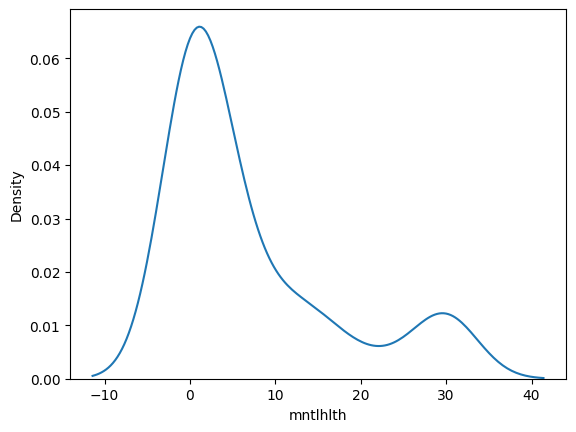

In [24]:
sns.kdeplot(df,x="mntlhlth")
df['mntlhlth'].describe()

Looking at the mental health variable, there is a slight skew towards the right in the density plot. On average, the respondents took around 7 (6.97) mental health days off in a month.

mntlhlth                                                 
                 count      mean        std  min  25%  50%    75%   max
wrkslf                                                                 
self-employed     14.0  4.928571   8.525656  0.0  0.0  0.0   6.75  30.0
someone else     106.0  7.235849  10.068860  0.0  0.0  2.0  10.00  30.0

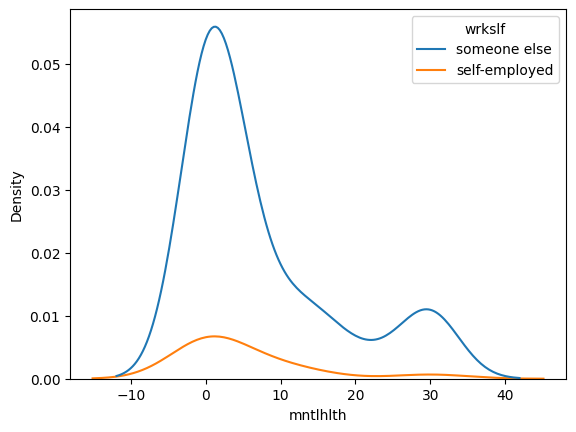

In [25]:
sns.kdeplot(df,x="mntlhlth",hue="wrkslf")
df.loc[:,["wrkslf","mntlhlth"]].groupby("wrkslf").describe()

On average, workers who were self-employeed took around 5 days (4.93) mental health days off in a month. Workers who were employed by someone else took around 7 (7.24) mental health days off in a month.

mntlhlth                                                 
            count      mean        std  min  25%  50%    75%   max
income16                                                          
Lower        53.0  9.245283  11.625413  0.0  0.0  3.0  15.00  30.0
Middle       49.0  5.836735   8.382390  0.0  0.0  2.0   8.00  30.0
Upper        18.0  3.333333   6.324555  0.0  0.0  0.5   2.75  20.0

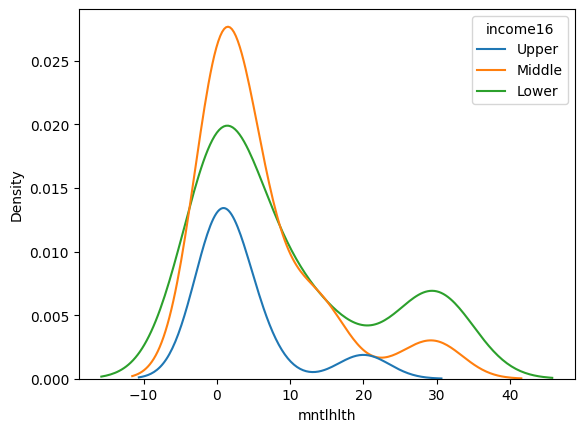

In [26]:
sns.kdeplot(df,x="mntlhlth",hue="income16")
df.loc[:,["income16","mntlhlth"]].groupby("income16").describe()

On average, workers who were in the low income group took around 9 days (9.24) mental health days off in a month. Workers who were in the middle income took around 6 (5.84) mental health days off in a month and high income earners took around 3 (3.33) mental health days off in a month on average.




<ipython-input-27-31f44acfec8e>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df,x="mntlhlth",hue="WorkStatusXIncomeLevel")


mntlhlth                                             \
                          count      mean        std  min  25%  50%    75%   
wrkslf        income16                                                       
self-employed Lower        10.0  6.300000   9.730251  0.0  0.0  1.0   9.25   
              Middle        2.0  0.000000   0.000000  0.0  0.0  0.0   0.00   
              Upper         2.0  3.000000   4.242641  0.0  1.5  3.0   4.50   
someone else  Lower        43.0  9.930233  12.020608  0.0  0.0  4.0  17.50   
              Middle       47.0  6.085106   8.472025  0.0  0.0  3.0   9.00   
              Upper        16.0  3.375000   6.642038  0.0  0.0  0.5   2.25   

                              
                         max  
wrkslf        income16        
self-employed Lower     30.0  
              Middle     0.0  
              Upper      6.0  
someone else  Lower     30.0  
              Middle    30.0  
              Upper     20.0

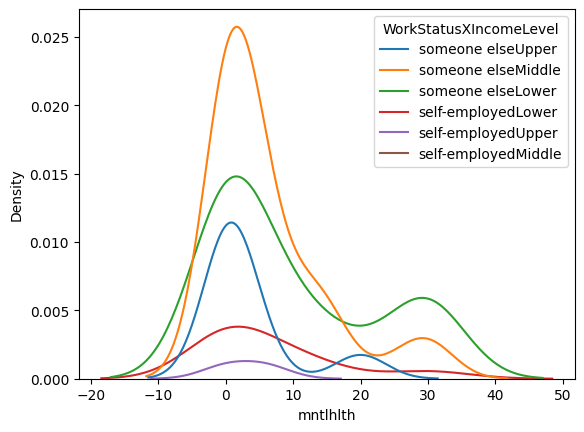

In [27]:
df["WorkStatusXIncomeLevel"] = df["wrkslf"]+df["income16"]
sns.kdeplot(df,x="mntlhlth",hue="WorkStatusXIncomeLevel")
df.loc[:,['wrkslf','income16','mntlhlth']].groupby(['wrkslf','income16']).describe()

Looking at the interaction between income levels and work status, the group that took the most mental health days on average were the lower income employed workers (9.93). The group that took the least amount of mental health days off, on average, were the self-employed middle income group (0.00).

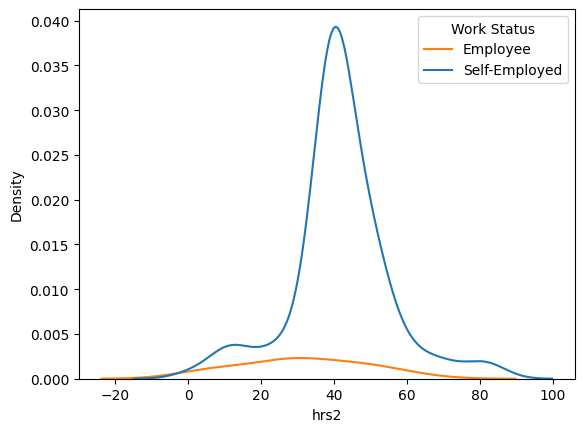

,count,mean,std,min,25%,50%,75%,max
wrkslf,,,,,,,,
self-employed,14.0,31.285714,16.817704,6.0,25.0,30.0,46.0,60.0
someone else,106.0,41.735849,13.401707,1.0,40.0,40.0,50.0,84.0


In [28]:
# kernel density plot
sns.kdeplot(data=df,x='hrs2',hue='wrkslf')
plt.legend(title='Work Status',labels=["Employee","Self-Employed"])
plt.show()
df.groupby('wrkslf')['hrs2'].describe()

The kernel densitiy plot shows an approximately normal distribution for the hours worked variable. The normal shape is beneficial to future analyses and the validity of predictions. Self employed workers work on average 31.3 hours while employed workers work 41.7 hours on average.

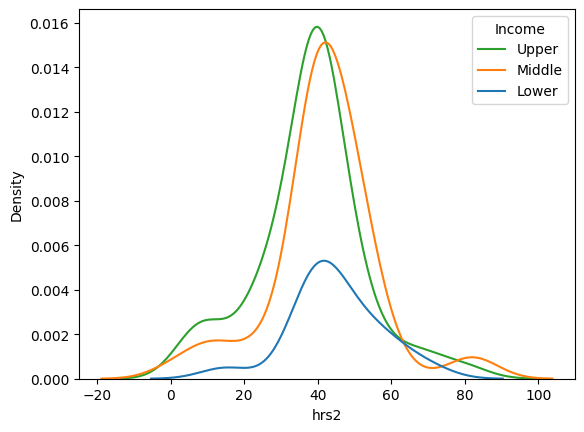

,count,mean,std,min,25%,50%,75%,max
income16,,,,,,,,
Lower,53.0,38.018868,14.398839,6.0,30.0,40.0,40.0,80.0
Middle,49.0,41.653061,14.369457,1.0,40.0,40.0,50.0,84.0
Upper,18.0,44.777778,12.061390,15.0,40.0,41.0,50.0,70.0


In [29]:
sns.kdeplot(data=df,x='hrs2',hue='income16')
plt.legend(title='Income',labels=["Upper","Middle","Lower"])
plt.show()
df.groupby('income16')['hrs2'].describe()


The kernel densitiy plot shows an approximately normal distribution for the income variable. Again, the normal shape is beneficial to future analyses and the validity of predictions. The lower income group works on average 38 hours a week (38.01), the middle income group works 42 hours a week (41.65), and the upper income group works around 45 hours a week on average (44.78).

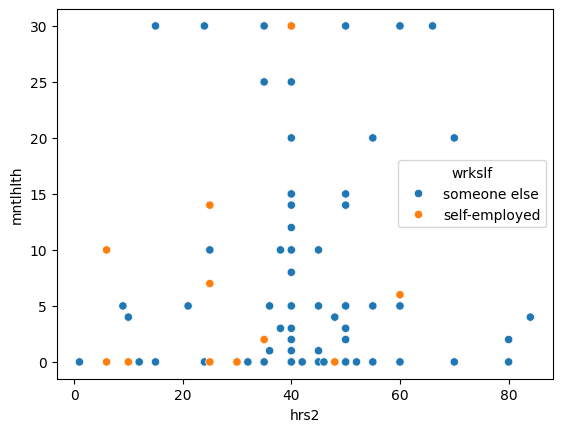

In [30]:
sns.scatterplot(data=df,x='hrs2',y='mntlhlth', hue='wrkslf')
correlation_employment = df.groupby('wrkslf').apply(lambda x: x['hrs2'].corr(x['mntlhlth']))

In the scatterplot comparing mental health days taken off to hours worked (grouped by employment), self-employed workers (0.03) had higher correlation with mental health days taken off than employed workers (0.01). There seems to be almost no correlation between hours worked and mental health days taken off in a month when grouped by employment.

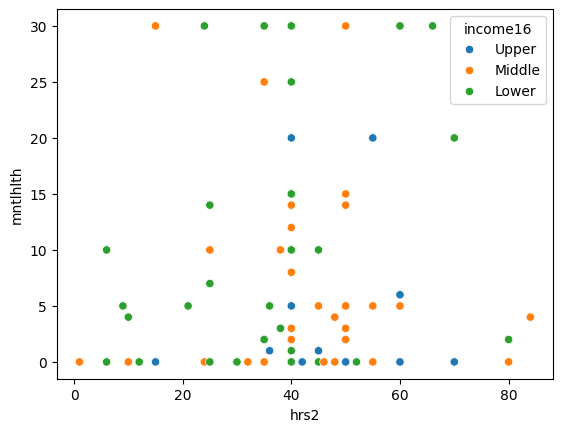

In [31]:
sns.scatterplot(data=df,x='hrs2',y='mntlhlth', hue='income16')
correlation_income = df.groupby('income16').apply(lambda x: x['hrs2'].corr(x['mntlhlth']))

In the scatterplot comparing mental health days taken off to hours worked (grouped by income), the lowest income group had the highest correlation with mental health days off (0.16) and the middle income group had the lowest correlation (0.05). There is a weak correlation between hours worked and mental health days taken off in a month when grouped by income groups.